# Part 1: Solving an Initial Value Problem (Falling Head Test)

## Groundwater Flow and the Hydraulic Head Test

![falling Head Test](https://files.mude.citg.tudelft.nl/falling_head.png)

The falling head test is a test to determine the hydraulic conductivity[^1] of a soil sample.
The soil sample is put in a box with water. A glass tube in the sample is used to measure the hydraulic head $h$.
Before the test, water is poured in the tube while the valve is closed.
At the start of the test, the valve is opened and the decrease of the hydraulic head is measured over time.

The hydraulic head $h$ in this test can be defined by the following ordinary differential equation:

$$ \frac{dh}{dt} = - \frac{K A h}{a L} $$

where
*   $h$ = hydraulic head [length] (measured in the tube)
*   $K$ = hydraulic conductivity [length/time]
*   $A$ = cross section area of the sample [length²]
*   $a$ = cross section area of the tube [length²]
*   $L$ = sample height [length]

> Source: A. Verruijt, Grondmechanica / Soil Mechanics; https://geo.verruijt.net/software/SoilMechBook2012.pdf (to be used, copied and distributed without restriction)

In this notebook we will solve the decreasing hydraulic head ("falling head") $h$ in time ($t$).

[^1]: The *hydraulic conductivity* (units of length per time) describes the ease with which a fluid (in this case water) moves through a porous medium (here the soil sample) and is both a property of the fluid and the porous medium. In some fields (e.g., geotechnical engineering), this parameter is sometimes also referred to as the *permeability coefficient*. However, this usage is ambiguous because in many fields (e.g., hydrogeology, petroleum engineering) the term permeability is used for the *intrinsic permeability* (units of length squared), which is only a property of the porous medium and does not depend on the fluid.

### True solution:
The true solution can be obtained by solving the differential equation analytically:
$$h = h_0 \, \exp \left( \frac{-K A t}{a L} \right) $$


<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.1:}$
    
Run the cells below to define the parameters and visualise the analytical solution:

</p>
</div>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

K = 1e-6  # hydraulic conductivity
A = 0.1  # cross section area of the sample
a = 0.001  # cross section area of the tube
L = 0.1  # sample height
h0 = 1.0  # initial groundwater head
t0 = 0.0  # start time
maxtime = 5000
dt = 500
n_steps = round(maxtime / dt)

In [2]:
t = np.linspace(0, maxtime, 1001)
h = [h0 * math.exp(-K * A * t[i] / (a * L)) for i in range(1001)]

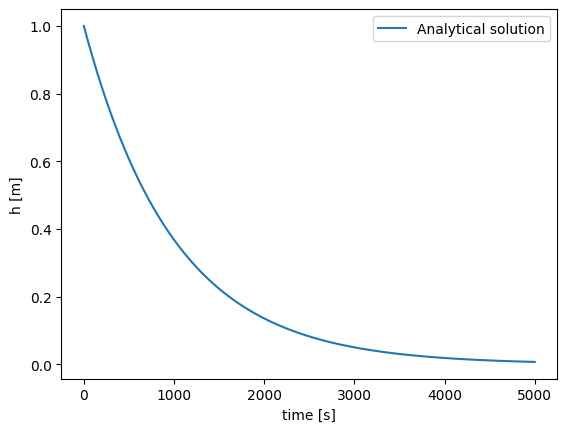

In [3]:
plt.plot(t, h, label="Analytical solution")
plt.xlabel("time [s]")
plt.ylabel("h [m]")
plt.legend()
plt.show()

### Euler Forward:

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.2:}$
    
Formulate the Euler Forward solution and complete the code below:

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 1.2:}$

Euler Forward formulation:

$$ \frac{h(t_{i+1}) - h(t_i)}{\Delta t} = - \frac{K A}{a L} h(t_i) $$

$$ h(t_{i+1}) = h(t_i) - \Delta t \frac{K A}{a L} h(t_i) = \left(1 - \Delta t \frac{K A}{a L}\right) h(t_i) $$

</p>
</div>

In [4]:
t_n = np.linspace(0, maxtime, n_steps + 1)
h_EF = []
h_EF.append(h0)
for i in range(n_steps):
    h_new = (1.0 - dt * K * A / (a * L)) * h_EF[-1]
    h_EF.append(h_new)

### Euler Backward:

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.3:}$
    
Formulate the Euler Backward solution and complete the code below:

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 1.3:}$

Euler Backward formulation:

$$ \frac{h(t_{i+1}) - h(t_i)}{\Delta t} = - \frac{K A}{a L} h(t_{i+1}) $$

$$ h(t_{i+1}) \left(1 + \Delta t \frac{K A}{a L} \right) = h(t_i) $$

$$ h(t_{i+1}) = h(t_i) / \left(1 + \Delta t \frac{K A}{a L} \right) $$

</p>
</div>



In [5]:
h_EB = []
h_EB.append(h0)
for i in range(n_steps):
    h_new = h_EB[-1] / (1.0 + dt * K * A / (a * L))
    h_EB.append(h_new)

### Heun's Method (= 2-stage Runge-Kutta):

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.4:}$
    
Formulate Heun's solution and complete the code below:

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 1.4:}$

Heun's method:

$$ h(t_{i+1}) = h(t_i) + \frac{\Delta t}{2} \left(k_1 + k_2 \right) $$

$$ k_1 = \frac{d h}{dt} \bigg\rvert_{t=t_i} = - \frac{K A}{a L} h(t_i) $$

$$ k_2 = \frac{d h}{dt} \bigg\rvert_{t=t_{i+1*}} \space with \space h(t_{i+1*}) = h(t_i) - \Delta t \frac{K A}{a L} h(t_i) $$

Hence:

$$ k_2 = - \frac{K A}{a L} \left(h(t_i) - \Delta t \frac{K A}{a L} h(t_i) \right) = - \frac{K A}{a L} \left(h(t_i) + \Delta t k_1 \right) $$

</p>
</div>



In [6]:
h_RK2 = []
h_RK2.append(h0)
for i in range(n_steps):
    fac = -K * A / (a * L)
    k1 = fac * h_RK2[-1]
    k2 = fac * (h_RK2[-1] + dt * k1)
    h_new = h_RK2[-1] + dt / 2 * (k1 + k2)
    h_RK2.append(h_new)

### 4-stage Runge-Kutta:

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.5:}$
    
Formulate the 4-stage Runge-Kutta solution and complete the code below:

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 1.5:}$

Runge-Kutta's method:

$$ h(t_{i+1}) = h(t_i) + \frac{\Delta t}{6} \left(k_1 + 2 k_2 + 2 k_3 + k_4 \right) $$

$$ k_1 = \frac{d h}{dt} \bigg\rvert_{t=t_i} = - \frac{K A}{a L} h(t_i) $$

$$ k_2 = \frac{d h}{dt} \bigg\rvert_{t=t_{i+1/2*}} \space \text{with} \space h(t_{i+1/2*}) = h(t_i) - \frac{\Delta t}{2} \frac{K A}{a L} h(t_i) = h(t_i) + \frac{\Delta t}{2} k_1 $$

$$ k_3 = \frac{d h}{dt} \bigg\rvert_{t=t_{i+1/2}} \space \text{with} \space h(t_{i+1/2}) = h(t_i) - \frac{\Delta t}{2} \frac{K A}{a L} h(t_{i+1/2*}) = h(t_i) + \frac{\Delta t}{2} k_2 $$

$$ k_4 = \frac{d h}{dt} \bigg\rvert_{t=t_{i+1*}} \space \text{with} \space h(t_{i+1*}) = h(t_i) - \Delta t \frac{K A}{a L} h(t_{i+1/2}) = h(t_i) + \Delta t k_3$$

</p>
</div>



In [7]:
h_RK4 = []
h_RK4.append(h0)
for i in range(n_steps):
    fac = -K * A / (a * L)
    k1 = fac * h_RK4[-1]
    k2 = fac * (h_RK4[-1] + dt / 2 * k1)
    k3 = fac * (h_RK4[-1] + dt / 2 * k2)
    k4 = fac * (h_RK4[-1] + dt * k3)
    h_new = h_RK4[-1] + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    h_RK4.append(h_new)

### Plot results

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.6:}$
    
Run the code cell below to show the different solutions:

</p>
</div>

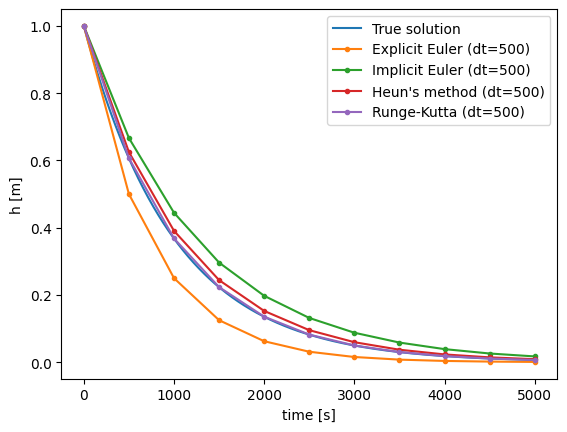

In [8]:
plt.plot(t, h, label="True solution")
plt.plot(t_n, h_EF, label=f"Explicit Euler (dt={dt})", marker=".")
plt.plot(t_n, h_EB, label=f"Implicit Euler (dt={dt})", marker=".")
plt.plot(t_n, h_RK2, label=f"Heun's method (dt={dt})", marker=".")
plt.plot(t_n, h_RK4, label=f"Runge-Kutta (dt={dt})", marker=".")
plt.xlabel("time [s]")
plt.ylabel("h [m]")
plt.legend()
plt.show()

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.7:}$
    
Comment on the various results in view of the true solution and their numerical stability.

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 1.7:}$

Euler Forward solution is unstable for $dt > 2000$ and predicts $h$ to decrease too quickly. Note that for $dt > 1000$ the solution already starts oscillating and becomes non-physical (showing negative $h$-values).

Euler Backward solution is unconditionally stable but predicts $h$ to decrease too slowly.

Heun's solution is stable and more accurate than the Euler solutions; still, $h$ decreases a bit too slowly.

Runge-Kutta's solution is stable and much more accurate than the other solutions.

</p>
</div>


> By Ronald Brinkgreve, Anna Störiko, Delft University of Technology. CC BY 4.0, more info [on the Credits page of Workbook](https://mude.citg.tudelft.nl/workbook-2025/credits.html).